p_value: 4.8348e-06 < 0.05 (Reject H0)


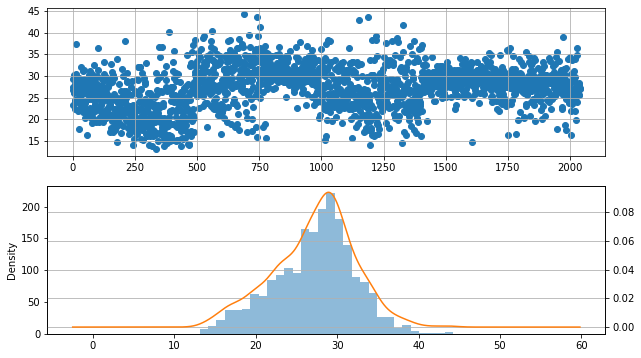

In [4]:
import pandas as pd
from scipy.stats import normaltest
import matplotlib.pyplot as plt
%matplotlib inline

# Bug @  ~\AppData\Roaming\Python\Python39\site-packages\xlrd\xlsx.py:L60
data = pd.read_excel('data.xlsx')
_, p_value = normaltest(data['平均年龄'])
print(f'p_value: {p_value:.4e} {"< 0.05 (Reject H0)" if p_value < 0.05 else "> 0.05 (Accept H0)"}')


fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(data['平均年龄'].index, data['平均年龄'].values)
plt.grid()
ax2 = fig.add_subplot(2, 1, 2)
data['平均年龄'].hist(bins=30,alpha=0.5,ax=ax2)
data['平均年龄'].plot(kind='kde', secondary_y=True,ax=ax2)
plt.grid()
plt.show()